In [75]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import db_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
datasets = [
    'MNIST-SMALL',
    'COIL20',
    'COUNTRY-2014',
    'BREAST-CANCER95',
    'MPI',
    'DIABETES'
]

dataset_name = 'MNIST-SMALL'
db_name = 'DB_{}'.format(dataset_name)
key_name_in_DB = 'constraints'
dfc = db_utils.load_data(db_name, key_name_in_DB)
dfc = dfc.loc[:, dfc.columns != 'reproduce_seed']

In [86]:
# find the most closed perplexity to the given rounded value
# e.g, given `rounded_perp = 5`, return `real_perp = 5.014803659274878`
list_perps = sorted(dfc.perp.unique(), reverse=True)

from math import isclose
tolerance = 1e-2
def _closet(rounded_perp):
    # find the closed value with `tolerance`. if not found, return None
    for real_perp in list_perps:
        if isclose(real_perp, rounded_perp, rel_tol=tolerance):
            return real_perp
    return None # tolerance is too large

def _approximated_closed(rounded_perp):
    # always return the closet real_perp
    diff = [abs(real_perp - rounded_perp) for real_perp in list_perps]
    idx = diff.index(min(diff))
    return list_perps[idx]

In [94]:
def _plot_bar_err_by_nconstraints(dfc, ax, perp=None, key='s_all', last_row=False):
    if perp is None:
        title = ' with all perplexities ({})'.format(dataset_name)
    else:
        title = ' (perp={:.3f})'.format(perp)
        dfc = dfc[(dfc.perp==perp)]
    dfc3 = dfc.groupby('n_constraints')

    means = dfc3[key].mean()
    errors = dfc3[key].std()
    means.plot.bar(yerr=errors, ax=ax, color='#22493031')
    ax.set_title('$S_{\mathcal{M}+\mathcal{C}}$' + title)
    
    if last_row is False:
        ax.get_xaxis().set_visible(False)

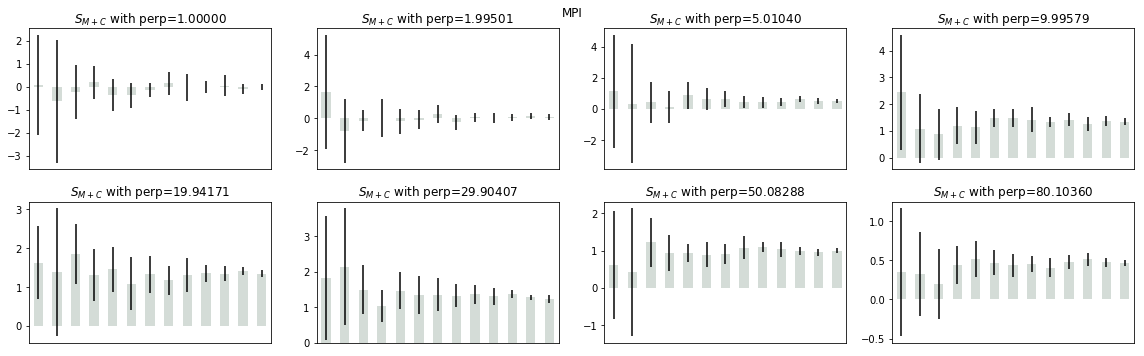

In [82]:
fig, ax = plt.subplots(2, 4, figsize=(16, 5))
perps = list(map(_approximated_closed, [1, 2, 5, 10, 20, 30, 50, 80]))
for i, perp in enumerate(perps):
    r, c = i//4, i%4
    _plot_bar_err_by_nconstraints(dfc, ax[r][c], perp)

plt.suptitle(dataset_name)
plt.tight_layout()
# plt.savefig('./plots/[{}]S_all_nconstraints.png'.format(dataset_name))
plt.show()

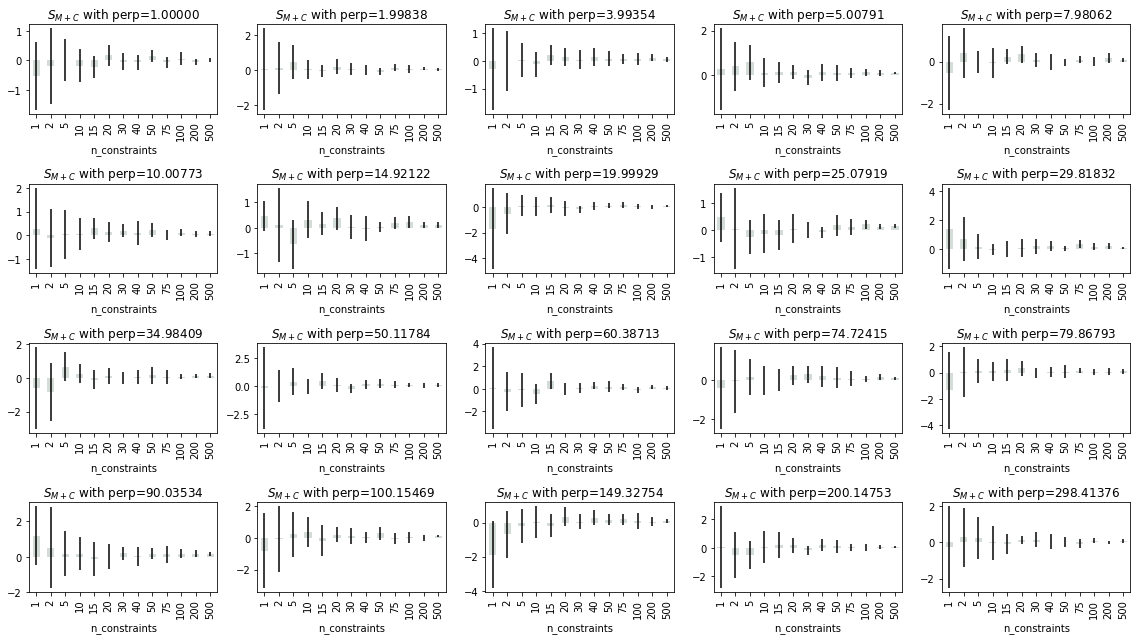

In [27]:
fig, ax = plt.subplots(4, 5, figsize=(16, 9))
perps = list(map(_approximated_closed, [
    1, 2, 4, 5, 8, 
#     10, 20, 30, 40, 50,
#     100, 120, 150, 200, 300,
#     500, 850, 1300, 1750, 1800
    10, 15, 20, 25, 30,
    35, 50, 60, 75, 80,
    90, 100, 150, 200, 300,
]))
for i, perp in enumerate(perps):
    r, c = i//5, i%5
    _plot_bar_err_by_nconstraints(dfc, ax[r][c], perp)

# plt.suptitle(dataset_name)
plt.tight_layout()
plt.savefig('./plots/[{}]S_all_nconstraints_more.png'.format(dataset_name))
plt.show()

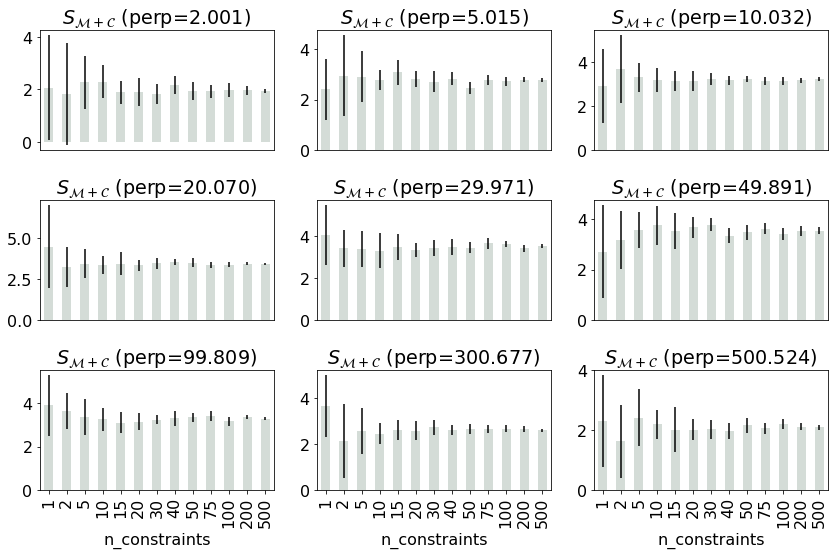

In [95]:
fig, ax = plt.subplots(3, 3, figsize=(12, 8))
perps = list(map(_approximated_closed, [
    2, 5, 10,
    20, 30, 50,
    100, 300, 500
]))
for i, perp in enumerate(perps):
    r, c = i//3, i%3
    _plot_bar_err_by_nconstraints(dfc, ax[r][c], perp, last_row=r==2)

# plt.suptitle(dataset_name)
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.savefig('./plots/mnist_s_vs_nconstraint.pdf'.format(dataset_name))
plt.show()

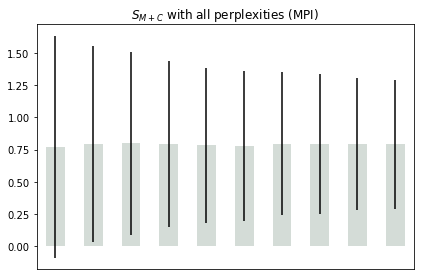

In [83]:
fig, ax = plt.subplots()
dfc4 = dfc[dfc.n_constraints > 5]
_plot_bar_err_by_nconstraints(dfc4, ax)
plt.tight_layout()
# plt.savefig('./plots/[{}]S_all_nconst_gt5.png'.format(dataset_name))